#  SP: Tonelada métrica per cápita de emisiones de CO2
Charbely Cisneros A01720514

## Imports, carga de archivo y limpieza

In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 3.2 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.6 MB/s            
     |████████████████████████████████| 233 kB 58.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.2 MB 4.6 MB/s            �█████████▊         | 16.5 MB 4.6 MB/s eta 0:00:02
     |████████████████████████████████| 306 kB 70.4 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=1dc4e94685f5b17bdfbf24047dd3fbed905facdf7676d8f45874ab7b0f4215fb
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import numpy as np
from sklearn import linear_model

In [7]:
df=pd.read_excel('datasets/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884_2.xls',
                 sheet_name='Data',
                skiprows=range(3))

In [8]:
df.columns=list(map(str,df.columns))

In [9]:
df['Total']=df.iloc[:,5:].sum(axis=1)
df.head()
df.set_index('Country Name',inplace=True)

In [10]:
df.drop(['2019',    '2020'],
        inplace=True,
        axis=1
       )
#df.columns

In [11]:
años=list(map(str,range(1960,2019)))
#años

## Introducción

Este conjunto de datos fue generado por el centro Carbon Dioxide Information Analysis Center de Tennessee en los Estados Unidos y fue extraido de la página de The World Bank.

Enlace a The World Bank para descargar: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?view=chart  

### Descripción de los datos

En este set de datos podemos encontrar las toneladas métricas de emisiones de CO2 (dioxido de carbono) de 236 países de los años 1960-2018.

La tabla tiene las siguientes columnas:


In [12]:
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       'Total'],
      dtype='object')

De interes:
* 'Country Name' es un variable cualitativa, explica los nombres de los países bajo estudio.
* 'Country Code' es un variable cualitativa, explica el codigo de los países bajo estudio.
* 'Region' es una variable cualitativa, explica la región donde pertenecen los países bajo estudio.
* '1960' - '2018' es una variable cuantitativa, explica las cantidad de toneladas metricas de emisiones de CO2 por cada país bajo estudio en ese año.
* 'Total' es una variable cuantitativa, contiene la suma de toneladas metricas de emisiones de CO2 de cada país en los años 1960-2018.

Otras:
* 'Income Group' es una variable cualitativa, explica el grupo de ingresos de los países bajo estudio.
* 'Indicator Name' es un variable cualitativa, explica el tipo de indicador utilizado en el estudio.
* 'Indicator Code' es un variable cualitativa, explica el explica el codigo del indicador bajo estudio.

### Tabla

In [13]:
df

,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,AFE,0,0,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,...,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,64.274924
Afghanistan,AFG,South Asia,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,...,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,8.813541
Africa Western and Central,AFW,0,0,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,...,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,26.000799
Angola,AGO,Sub-Saharan Africa,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,...,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,40.564875
Albania,ALB,Europe & Central Asia,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,...,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,97.965540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,East Asia & Pacific,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.135031,0.163542,0.158377,0.184037,0.208106,...,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588,40.887810
"Yemen, Rep.",YEM,Middle East & North Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,...,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682,26.085665
South Africa,ZAF,Sub-Saharan Africa,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,...,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645,442.350573


## Pregunta de Investigación 1: ¿Cuáles son los países que han emitido más CO2 durante los años?  ¿Cuáles son los que han emitido menos CO2?

Text(0, 0.5, 'Tonelada métrica de CO2')

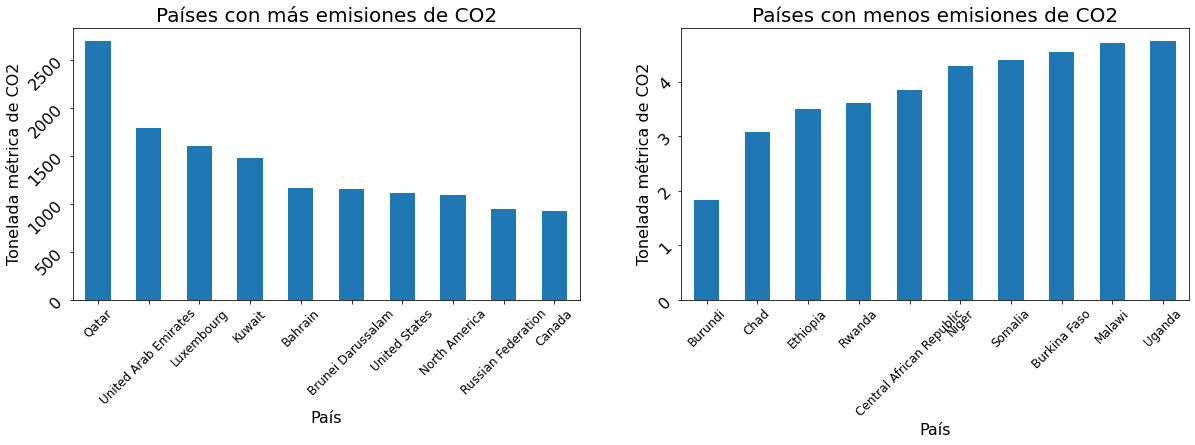

In [14]:
df_topten=df.sort_values(by='Total', 
                          ascending=False,
                          axis=0,
                         )
df_topten=df_topten.head(10)
df_topten=df_topten.loc[:,'Total']

df_bottten=df.sort_values(by='Total', 
                          ascending=True,
                          axis=0,
                         )
df_bottten=df_bottten.head(10)
df_bottten=df_bottten.loc[:,'Total']

fig=plt.figure()

ax1=fig.add_subplot(1,2,1) #1 renglon, 2 columnas, posicion 1
df_topten.plot(kind='bar',figsize=(20,5))

plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Países con más emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)   

ax2=fig.add_subplot(1,2,2) #1 renglon, 2 columnas, posicion 2
df_bottten.plot(kind='bar')
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Países con menos emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* Muchos de los que se encuentran en los mayores lugares son del Middle East y América del Norte. 
* Al igual, los que se enuentran en la gráfica de menores emisiones de CO2 son de Africa. 
* ¿Habra una relación entre la región y las emisiones de CO2?

## Pregunta de Investigación 2: ¿Hay alguna relación entre las emisiones de CO2  y la región?

Text(0, 0.5, 'Tonelada métrica de CO2')

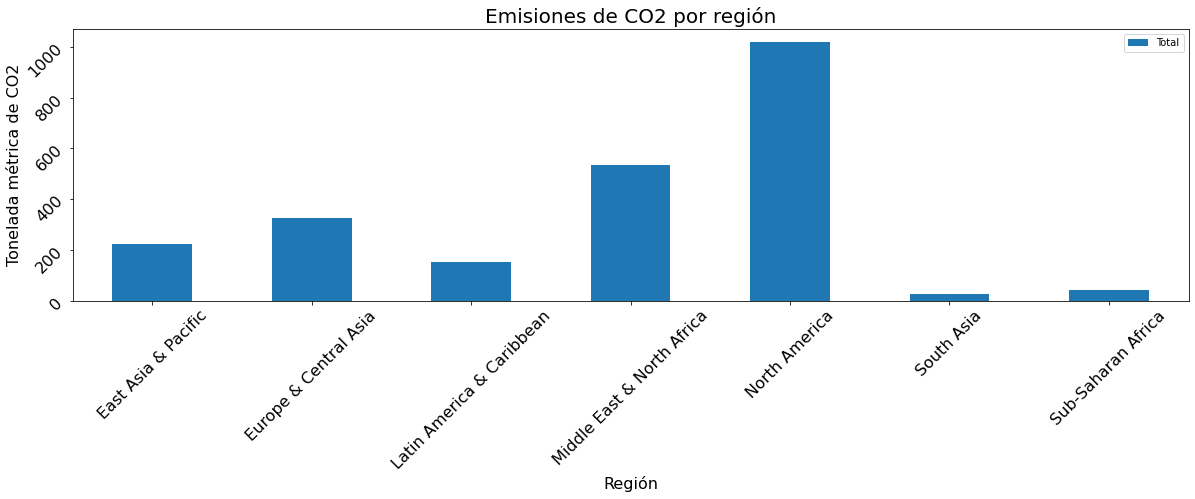

In [15]:
my_pivot=pd.pivot_table(df,
                        index='Region',
                        values='Total',
                       )
my_pivot=my_pivot.drop(0,axis=0)
my_pivot.plot(kind='bar',figsize=(20,5))
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 por región', fontsize=20)

plt.xlabel('Región', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* El estar en un tipo de región tiene un impacto en la cantidad de emisiones de CO2.
* En esta gráfica podemos observar que las regiones con mayor emisiones de CO2 son "Middle East & North Africa" y "North America."
* La región con menores emisiones de CO2 son de "South Asia" y "Sub-Saharan Africa."

## Pregunta de Investigación 3: ¿Cuál es el comportamiento de México en sus emisiones de CO2?

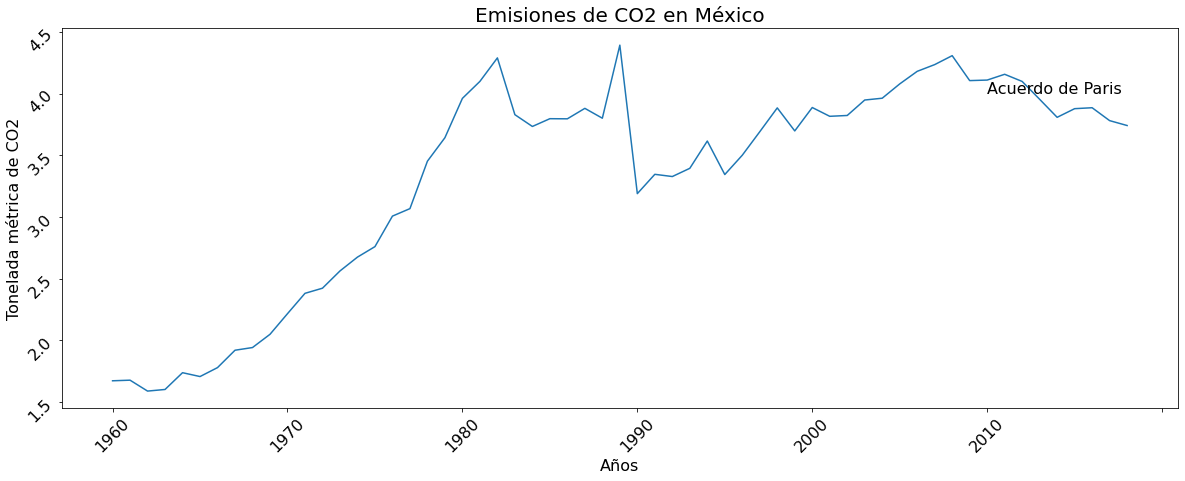

In [16]:
dfmex=df.loc['Mexico',años]

dfmex.plot(kind='line',figsize=(20,7))

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 en México', fontsize=20)

plt.xlabel('Años', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)
plt.text(50,4,'Acuerdo de Paris', fontsize=16)
plt.show()

### Conclusión

* México ha incrementado sus emisiones de CO2 desde 1960.
* Desde el Acuerdo de París, México ha tenido una tendencia negativa en sus emisiones de CO2. 

## Pregunta de Investigación 4: ¿Hay alguna relación entre el tipo de región y sus emisiones de CO2?

In [17]:
modelA= sm.OLS.from_formula('Total~Region', data=df)
resultA= modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     9.831
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.05e-10
Time:                        17:20:30   Log-Likelihood:                -1668.4
No. Observations:                 236   AIC:                             3353.
Df Residuals:                     228   BIC:                             3380.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              217.0255     41.767      5.196      0.000     134.726     299.325
Region[T.East Asia & Pacific]            7.5709     68.058      0.111      0.912    -126.533     141.675
Region[T.Europe & Central Asia]        110.5428     58.766      1.881      0.061      -5.250     226.336
Region[T.Latin America & Caribbean]    -62.0009     65.437     -0.947      0.344    -190.939      66.937
Region[T.Middle East & North Africa]   318.1614     77.015      4.131      0.000     166.409     469.913
Region[T.North America]                801.3267    208.836      3.837      0.000     389.831    1212.822
Region[T.South Asia]                  -189.6258    110.506     -1.716      0.088    -407.369      28.117
Region[T.Sub-Saharan Africa]          -175.7809     59.381     -2.960      0.003    -292.787     -58.775
==============================================================================
Omnibus:                      193.802   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.586
Skew:                           3.154   Prob(JB):                         0.00
Kurtosis:                      19.757   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Limitaciones

* No todos los países tienen datos en todos los años; hay algunos que tiene todos o la mayoría de los años vacios.
* Hay algunos países que no tienen registrado su región o tipo de ingreso.
* Desactualizada; sería interesante analizar los años 2019-2021.

## Siguientes pasos

* Encontrar una base de datos para complementar la información faltante de esta.
* Actividad 10 (hipotesis y predicción de modelos).